# How to Use MLP-PF
## Example on battery capacity

In [1]:
# import the core modules
from pf_core import *

2024-08-01 14:51:03.851833: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-01 14:51:03.985068: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-01 14:51:03.988185: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/cancelliere/miniconda3/pkgs/mpich-3.3.2-hc856adb_0/lib
2024-08-01 14:51:03.98

### Exploration of the capacity data

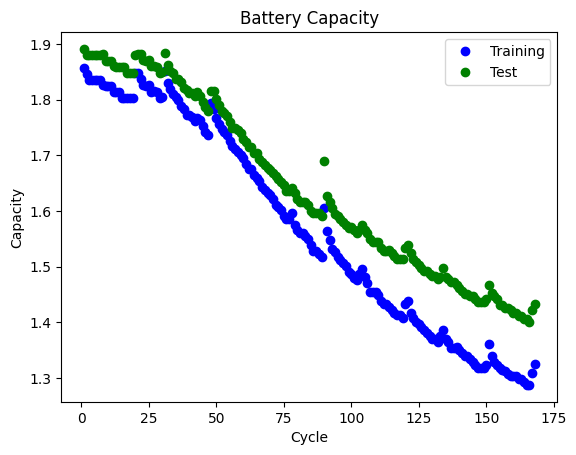

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# load a csv file with pandas
def load_csv_pandas(file):
    data = pd.read_csv(file)
    return data

training_data   = load_csv_pandas('data/capacity_battery5.csv')
test_data       = load_csv_pandas('data/capacity_battery7.csv')
#plot training data in blue circle
plt.plot(training_data['Cycle'], training_data['Capacity'], 'bo')
# plot test data in green circle
plt.plot(test_data['Cycle'], test_data['Capacity'], 'go')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.title('Battery Capacity')
plt.legend(['Training', 'Test'])
plt.show()


### Definition of the hyperparameters

In [3]:
#Number of the simulation for saving the results: it loops to save the results in different files
sim_num       = 1

# Name of the file for the training and test data, to be saved in the data folder
test_pack     = "capacity_battery5"
training_pack = "capacity_battery7"
# Name of the variable to be used as the x-axis and y-axis (Case dependent)
var_x         = "Cycle"
var_y         = "Capacity"
# if degradation trend is downward, "positive" else "negative (for example for capacity, it is positive)"
degradation   = "positive" 
# Define Degradation Threshold and Preditcion Time Horizon
y_failure     = 1.3
horizon       = 200

# Define the parameters for the Particle Filter and Neural Network

Ns   = 500          # Number of Particles
s2x0 = 0.005        # Initial state noise
s2x1 = 100          # State noise decay
s2x2 = 0.0001       # State noise floor
s2z  = 0.5    # Measurement noise

# Decide if training a new model or loading a pre-trained model
save_weights  = 0
#if save_weights = 1, select the name:
model_name    = "battery5"
load_weights  = 1
hidden_nodes  = 3      # Number of hidden nodes
epochs        = 100    # Number of epochs for training

# Decide if showing the figures, saving them or the both
save_data_fig = 1
show_fig      = 0

# Define the alpha for the beta metric
alpha = 0.2
name_experiment = "Exp1"

In [4]:
battery_pf = MLP_PF(test_pack     = test_pack, 
                    training_pack = training_pack, 
                    model_name    = model_name,
                    var_x         = var_x,
                    var_y         = var_y,
                    degradation   = degradation,
                    horizon       = horizon,
                    y_failure     = y_failure,
                    save_data_fig = save_data_fig, 
                    show_fig      = show_fig, 
                    save_weights  = save_weights, 
                    load_weights  = load_weights, 
                    Ns            = Ns, 
                    hidden_nodes  = hidden_nodes,
                    epochs        = epochs, 
                    s2z           = s2z, 
                    s2x0          = s2x0, 
                    s2x1          = s2x1, 
                    s2x2          = s2x2,
                    alpha         = alpha,
                    hydra         = False,
                    name_exp      = name_experiment)
                    


In [5]:
cic, cre, beta, cic_25, cre_25, beta_25 = battery_pf.run()

2024-08-01 14:51:05.360077: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/cancelliere/miniconda3/pkgs/mpich-3.3.2-hc856adb_0/lib
2024-08-01 14:51:05.360120: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-01 14:51:05.360139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sangoku-l64): /proc/driver/nvidia/version does not exist
2024-08-01 14:51:05.360392: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the a

In [6]:
print("CIC: ", cic)
print("CRE: ", cre)
print("Beta: ", beta)

CIC:  0.31875
CRE:  0.6693399149104565
Beta:  0.3205707277494363


TypeError: save_plot_history() missing 4 required positional arguments: 'texp', 'pred_train', 'pred_nn', and 'font_size'